In [25]:
import networkx as nx
import matplotlib.pyplot as matplot
import pandas as pandas
import numpy as numpy
import collections

In [3]:
Graph = nx.read_gml('football.gml')

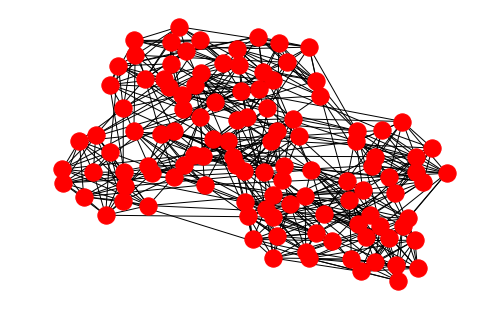

In [6]:
nx.draw(Graph)

# Exploratory Data Analysis on Graph

## Graph Level EDA

In [41]:
# check the frequency on each node degree value. This suggests how many connections each node has got
pandas.DataFrame(list(nx.degree(Graph)), columns = ['Node', 'Degree'])

,Node,Degree
0,BrighamYoung,12
1,FloridaState,12
2,Iowa,12
3,KansasState,12
4,NewMexico,11
5,TexasTech,12
6,PennState,12
7,SouthernCalifornia,12
8,ArizonaState,11
9,SanDiegoState,11


In [16]:
#check the frequency of each degree value. 
#This is an important feature to check whether the graph exhibits power law distribution
nx.degree_histogram(Graph)

[0, 0, 0, 0, 0, 0, 0, 1, 3, 5, 28, 66, 12]

(array([10.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0. ,  6.6, 13.2, 19.8, 26.4, 33. , 39.6, 46.2, 52.8, 59.4, 66. ]),
 <a list of 10 Patch objects>)

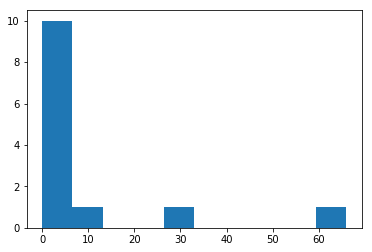

In [17]:
matplot.hist(nx.degree_histogram(Graph))

In [20]:
def plot_degree_dist(G):
    degree_hist = nx.degree_histogram(G)
    degree_hist = numpy.array(degree_hist, dtype=float)
    degree_prob = degree_hist/G.number_of_nodes()
    matplot.loglog(numpy.arange(degree_prob.shape[0]),degree_prob,'b.')
    matplot.xlabel('k')
    matplot.ylabel('p(k)')
    matplot.title('Degree Distribution')
    matplot.show()

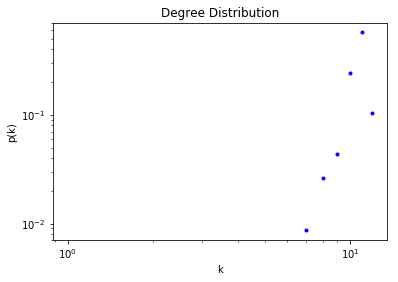

In [21]:
plot_degree_dist(Graph)

In [26]:
def Draw_Node_Degree_Histogram(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = matplot.subplots()
    matplot.bar(deg, cnt, width=0.80, color="b")
    matplot.title("Degree Histogram")
    matplot.ylabel("Count")
    matplot.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    # draw graph in inset
    matplot.axes([0.4, 0.4, 0.5, 0.5])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(G)
    matplot.axis("off")
    nx.draw_networkx_nodes(G, pos, node_size=20)
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    matplot.show()

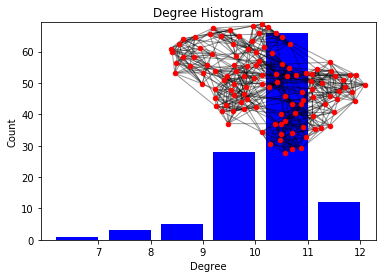

In [27]:
Draw_Node_Degree_Histogram(Graph)

In [28]:
#Check Graph density - (density) = 2*(the number of edges) / [(the number of nodes) * (the number of nodes - 1)]
# Density closer to 1 means graph is highly connected and closer to 0 means graph is loosely connected
nx.density(Graph)

0.0935163996948894

In [29]:
#Check summary of information for the graph G or a single node n. This can be looked as a summary statistics
print(nx.info(Graph))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 613
Average degree:  10.6609


In [60]:
#Check whether the graph edges are directed or not. This is important to understand as node level metrics, Graph algorithms like random walks
#Node embeddings etc behaves differently if graph is directed or undirected. This returs a boolean - True or False
nx.is_directed(Graph)

False

In [43]:
#Check whether a graph has no edges
nx.is_empty(Graph)

False

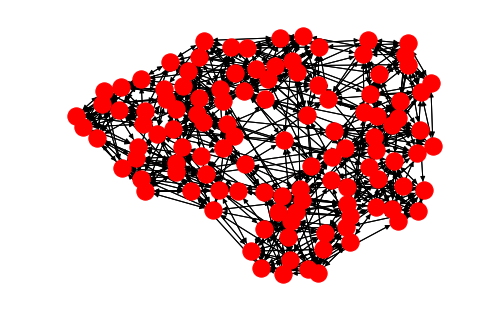

In [44]:
#Reverse view of a directed graph
nx.draw(nx.reverse_view(nx.to_directed(Graph)))


In [45]:
#Check whether there are any self loops in the graph
nx.number_of_selfloops(Graph)

0

In [46]:
#Check whether the graph is weighted. This returns a boolean - True or False
nx.is_weighted(Graph)

False

In [47]:
#Check whether the graph is negatively weighted. This returs a boolean - True or False
nx.is_negatively_weighted(Graph)

False

In [48]:
#Check the algrebraic connectivity for a graph. 
#The algebraic connectivity (also known as Fiedler value or Fiedler eigenvalue) of a graph G is the second-smallest eigenvalue (counting multiple eigenvalues separately) of the Laplacian matrix of G.[1] 
#This eigenvalue is greater than 0 if and only if G is a connected graph
#This can be implemented only for an undirected graph
nx.algebraic_connectivity(Graph)

1.4590013553448775

In [50]:
#Check the Fiedler Vector. 
#The Fiedler vector of a connected undirected graph is the eigenvector corresponding to the second smallest eigenvalue of the Laplacian matrix of of the graph
#This can be implemented only for an undirected graph
nx.fiedler_vector(Graph)

array([-0.04789142,  0.0913194 , -0.01513571, -0.07023465, -0.11239141,
       -0.10049887,  0.00460692, -0.14286396, -0.16363852, -0.12392848,
       -0.09669855, -0.087867  ,  0.11115785,  0.01167553,  0.09648651,
       -0.00811301, -0.08171676,  0.06835834,  0.12705794,  0.10784445,
        0.06552699, -0.13606268, -0.15724527, -0.13037142, -0.04944922,
        0.07221302,  0.10563806,  0.09555366, -0.06958717,  0.08777036,
        0.07436458,  0.11665203, -0.01154777,  0.09644463,  0.1263836 ,
        0.0890389 ,  0.10880906,  0.1045976 ,  0.07794128,  0.01735387,
       -0.11648895, -0.12433598,  0.12727941,  0.12079324,  0.07217047,
        0.09886412, -0.11047221, -0.02012657,  0.02110008, -0.0897275 ,
       -0.09966433, -0.14609075, -0.08894452, -0.06993462,  0.11518353,
        0.1008987 ,  0.08644031,  0.07339397,  0.01548382,  0.05925799,
        0.00467945,  0.1106381 ,  0.09805551,  0.06421788, -0.02354499,
        0.0697434 ,  0.05101433, -0.11321279, -0.15235112, -0.05

In [51]:
#The resultant vector will be of size of the graph (Nodes)
len(nx.fiedler_vector(Graph))

115

In [52]:
#Check the spectral ordering of a graph. The spectral ordering of a graph is an ordering of its nodes 
#where nodes in the same weakly connected components appear contiguous and ordered by their corresponding elements
#in the Fiedler vector of the component
nx.spectral_ordering(Graph)

['Connecticut',
 'Akron',
 'Buffalo',
 'EasternMichigan',
 'BowlingGreenState',
 'Marshall',
 'Kent',
 'NorthernIllinois',
 'MiamiOhio',
 'CentralFlorida',
 'VirginiaTech',
 'Temple',
 'Toledo',
 'WakeForest',
 'BallState',
 'Maryland',
 'GeorgiaTech',
 'Pittsburgh',
 'Duke',
 'Vanderbilt',
 'WesternMichigan',
 'Virginia',
 'Florida',
 'Ohio',
 'NorthCarolina',
 'Rutgers',
 'FloridaState',
 'Clemson',
 'Syracuse',
 'BostonCollege',
 'Kentucky',
 'Tennessee',
 'SouthCarolina',
 'Georgia',
 'CentralMichigan',
 'LouisianaState',
 'WestVirginia',
 'Louisville',
 'MiamiFlorida',
 'NorthCarolinaState',
 'EastCarolina',
 'MississippiState',
 'Auburn',
 'Arkansas',
 'Alabama',
 'MiddleTennesseeState',
 'LouisianaMonroe',
 'Cincinnati',
 'Mississippi',
 'Navy',
 'Memphis',
 'SouthernMississippi',
 'AlabamaBirmingham',
 'Tulane',
 'Army',
 'Houston',
 'Indiana',
 'Purdue',
 'LouisianaTech',
 'Northwestern',
 'Minnesota',
 'PennState',
 'MichiganState',
 'Wisconsin',
 'LouisianaLafayette',
 'Mich

In [53]:
#Check the eigenvalues of the adjacency matrix of G.For MultiGraph/MultiDiGraph, the edges weights are summed
nx.adjacency_spectrum(Graph)

array([10.78056787+0.j,  9.2784675 +0.j,  8.73005079+0.j,  8.39954615+0.j,
        8.15418178+0.j,  7.84711721+0.j,  7.65443103+0.j,  7.29133158+0.j,
        6.81798606+0.j,  6.2745543 +0.j,  5.36341773+0.j,  4.15321545+0.j,
        3.86759915+0.j,  3.18725244+0.j,  2.9318808 +0.j,  2.81611759+0.j,
       -4.5287817 +0.j, -4.4782562 +0.j, -4.2852105 +0.j, -4.25178872+0.j,
       -4.0551776 +0.j, -3.97793414+0.j,  2.49274363+0.j, -3.92946577+0.j,
       -3.90393762+0.j, -3.83574394+0.j,  2.3245661 +0.j,  2.26274756+0.j,
        2.16122922+0.j,  1.99565982+0.j, -3.64572561+0.j, -3.58874803+0.j,
       -3.47035804+0.j, -3.47949952+0.j, -3.34585817+0.j,  1.8580986 +0.j,
        1.79392064+0.j, -3.28127919+0.j, -3.29064136+0.j,  1.7296355 +0.j,
        1.59545316+0.j, -3.20640088+0.j, -3.02943709+0.j, -3.03883355+0.j,
        1.52961324+0.j, -2.93422032+0.j,  1.49229522+0.j,  1.44203606+0.j,
        1.38340733+0.j, -2.90649232+0.j, -2.81504648+0.j, -2.80409484+0.j,
       -2.72229136+0.j,  

In [54]:
#Check the eigenvalues of the laplacian matrix of G.For MultiGraph/MultiDiGraph, the edges weights are summed
nx.laplacian_spectrum(Graph)

array([1.24344979e-14, 1.45900136e+00, 1.93168001e+00, 2.41741453e+00,
       2.55560011e+00, 3.05189217e+00, 3.26273966e+00, 3.53820620e+00,
       4.10715998e+00, 4.33711371e+00, 4.51387550e+00, 4.96276972e+00,
       6.00794557e+00, 6.38496559e+00, 6.86615852e+00, 7.51142300e+00,
       7.78029078e+00, 7.97735039e+00, 8.05909083e+00, 8.36947246e+00,
       8.52390099e+00, 8.59880505e+00, 8.61684837e+00, 8.84752517e+00,
       8.89950082e+00, 8.95304492e+00, 8.99627241e+00, 9.18924161e+00,
       9.29730247e+00, 9.31721199e+00, 9.40349673e+00, 9.42100780e+00,
       9.47309830e+00, 9.68666849e+00, 9.68733339e+00, 9.78519921e+00,
       9.83048769e+00, 9.95429880e+00, 9.99234392e+00, 1.00223077e+01,
       1.00960314e+01, 1.01374665e+01, 1.01945243e+01, 1.02340188e+01,
       1.02767378e+01, 1.03405084e+01, 1.04587273e+01, 1.05810076e+01,
       1.06614601e+01, 1.06908670e+01, 1.07264499e+01, 1.07660537e+01,
       1.08273185e+01, 1.08887148e+01, 1.10143677e+01, 1.10702676e+01,
      

In [55]:
#Check the eigenvalues of the laplacian matrix of G.For MultiGraph/MultiDiGraph, the edges weights are summed
nx.laplacian_spectrum(Graph)

array([1.24344979e-14, 1.45900136e+00, 1.93168001e+00, 2.41741453e+00,
       2.55560011e+00, 3.05189217e+00, 3.26273966e+00, 3.53820620e+00,
       4.10715998e+00, 4.33711371e+00, 4.51387550e+00, 4.96276972e+00,
       6.00794557e+00, 6.38496559e+00, 6.86615852e+00, 7.51142300e+00,
       7.78029078e+00, 7.97735039e+00, 8.05909083e+00, 8.36947246e+00,
       8.52390099e+00, 8.59880505e+00, 8.61684837e+00, 8.84752517e+00,
       8.89950082e+00, 8.95304492e+00, 8.99627241e+00, 9.18924161e+00,
       9.29730247e+00, 9.31721199e+00, 9.40349673e+00, 9.42100780e+00,
       9.47309830e+00, 9.68666849e+00, 9.68733339e+00, 9.78519921e+00,
       9.83048769e+00, 9.95429880e+00, 9.99234392e+00, 1.00223077e+01,
       1.00960314e+01, 1.01374665e+01, 1.01945243e+01, 1.02340188e+01,
       1.02767378e+01, 1.03405084e+01, 1.04587273e+01, 1.05810076e+01,
       1.06614601e+01, 1.06908670e+01, 1.07264499e+01, 1.07660537e+01,
       1.08273185e+01, 1.08887148e+01, 1.10143677e+01, 1.10702676e+01,
      

In [58]:
#Check the eigenvalues of the modularity of matrix of G.For MultiGraph/MultiDiGraph, the edges weights are summed
nx.modularity_spectrum(Graph)

array([ 9.29844337e+00+0.j,  8.73058388e+00+0.j,  8.39962466e+00+0.j,
        8.15745943e+00+0.j,  7.85648591e+00+0.j,  7.65473767e+00+0.j,
        7.29223090e+00+0.j,  6.81931064e+00+0.j,  6.27586243e+00+0.j,
        5.36796875e+00+0.j,  4.15997115e+00+0.j,  3.86760049e+00+0.j,
        3.18792135e+00+0.j, -4.52881208e+00+0.j, -4.47830181e+00+0.j,
       -4.28539308e+00+0.j, -4.25179592e+00+0.j,  2.93189499e+00+0.j,
        2.81612004e+00+0.j, -4.05529247e+00+0.j, -3.97839152e+00+0.j,
       -3.92950465e+00+0.j, -3.90395676e+00+0.j,  2.49280210e+00+0.j,
       -3.83583547e+00+0.j,  2.32471876e+00+0.j,  2.26278184e+00+0.j,
        2.16146423e+00+0.j, -3.64586724e+00+0.j, -3.58880340e+00+0.j,
       -3.47956667e+00+0.j, -3.47053169e+00+0.j, -3.34589849e+00+0.j,
        1.99567614e+00+0.j, -3.28137026e+00+0.j, -3.29098338e+00+0.j,
        1.85877806e+00+0.j,  1.79392072e+00+0.j,  1.72975312e+00+0.j,
       -3.20648461e+00+0.j, -3.02965237e+00+0.j, -3.03883591e+00+0.j,
       -2.93422077e+